In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# https://fivethirtyeight.com/features/which-2020-candidates-have-the-most-in-common-on-twitter/
# geospatial: https://alysivji.github.io/getting-started-with-folium.html
# https://github.com/sacridini/Awesome-Geospatial
# https://nbviewer.jupyter.org/github/bmabey/hacker_news_topic_modelling/blob/master/HN%20Topic%20Modelling.ipynb


# def read_candidate(name):
#     data = json.load(open('./data/andrewyang_flr_full.json'))
name = 'JulianCastro'
df_1 = pd.read_json(f"./data/{name}_flr.json", lines=True)

name = 'BernieSanders'
df_2 = pd.read_json(f"./data/{name}_flr.json", lines=True)

print(df_1.columns)

# np.intersect1d(df2["name"], df1["name"])
overlap = df_2[df_2["id"].isin(df_1["id"])]
print(df_1.size/17)
print(df_2.size/17)
print(overlap.size/17)

Index(['background_image', 'bio', 'followers', 'following', 'id', 'join_date',
       'join_time', 'likes', 'location', 'media', 'name', 'private',
       'profile_image_url', 'tweets', 'url', 'username', 'verified'],
      dtype='object')
51617.0
49541.0
817.0


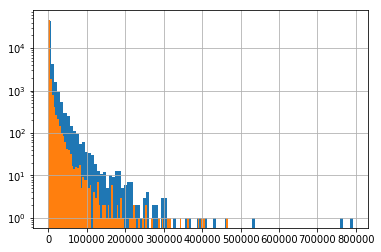

In [10]:
name = 'CoryBooker'
# df_3 = pd.read_json(f"./data/{name}_flr.json", lines=True)

fig, ax = plt.subplots()
df_1['tweets'].hist(ax=ax, bins=100)
df_2['tweets'].hist(ax=ax, bins=100)
# df_3['tweets'].hist(ax=ax, bins=100)

ax.set_yscale('log')

In [11]:
print(df_1['tweets'].mean(), df_1['tweets'].median())

5482.301683553868 846.0


In [12]:
print(df_2['tweets'].mean(), df_2['tweets'].median())

2003.6351304979714 50.0


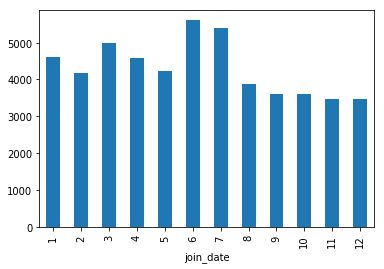

In [13]:
df_1['join_date'] = df_1["join_date"].astype("datetime64")
df_1.groupby(df_1["join_date"].dt.month)['join_date'].count().plot(kind="bar")

In [20]:
df_2['join_date'] = df_2["join_date"].astype("datetime64")
date_hist = df_2.groupby(df_2["join_date"].dt.date)['join_date'].count()

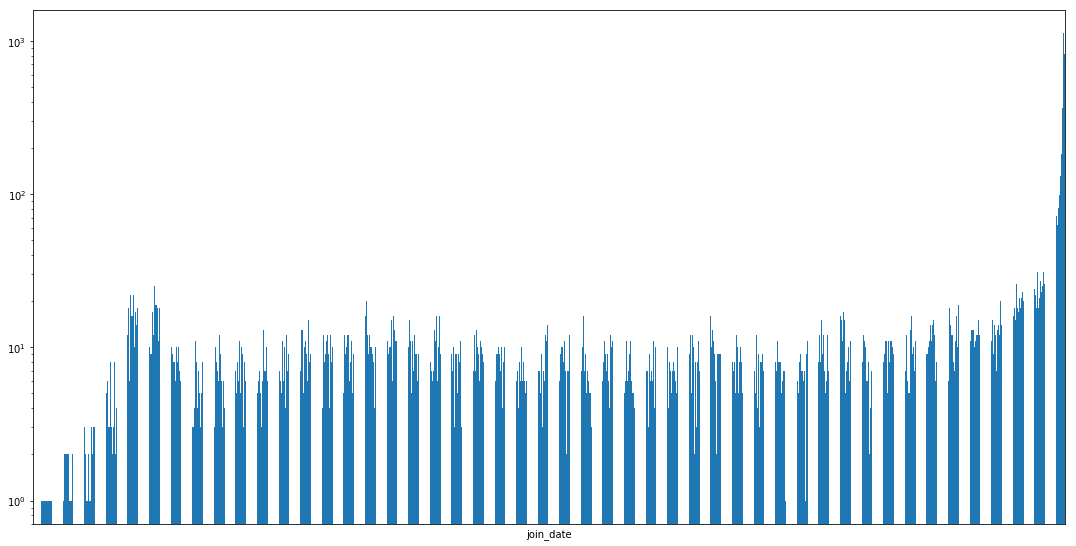

In [23]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)

date_hist.plot(ax=ax, kind="bar", logy=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()